In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('athlete_events.csv')
region_df = pd.read_csv('noc_regions.csv')

In [11]:
df = df[df['Season'] == "Summer"]

In [13]:
df.shape

(222552, 15)

In [10]:
# df['Season'].unique

In [14]:
df = df.merge(region_df,on='NOC',how='left')

In [16]:
df.shape

(222552, 17)

In [17]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [18]:
df.drop_duplicates(inplace=True)

In [21]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9030
Height     50500
Weight     52506
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     187090
region       370
notes     216770
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
# one hot encode the medel col
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [24]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)

,Gold,Silver,Bronze
NOC,,,
USA,2472.0,1333.0,1197.0
URS,832.0,635.0,596.0
GBR,635.0,729.0,620.0
GER,592.0,538.0,649.0
ITA,518.0,474.0,454.0
...,...,...,...
AHO,0.0,1.0,0.0
LBR,0.0,0.0,0.0
LCA,0.0,0.0,0.0


In [25]:
df[(df['NOC'] == 'IND') & (df['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
4186,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4190,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4460,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4461,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4462,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191759,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193964,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
193965,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
205949,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


In [38]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])

In [44]:
medal_tally

,Gold,Silver,Bronze
NOC,,,
USA,1035.0,802.0,708.0
URS,394.0,317.0,294.0
GBR,278.0,317.0,300.0
GER,235.0,261.0,283.0
FRA,234.0,256.0,287.0
...,...,...,...
AHO,0.0,1.0,0.0
LBR,0.0,0.0,0.0
LCA,0.0,0.0,0.0


In [41]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False)

In [46]:
# medal_tally[medal_tally['NOC'] == 'IND']

In [47]:
medal_tally.shape

(230, 3)

In [48]:
medal_tally['total'] = medal_tally['Gold']+ medal_tally['Silver']+ medal_tally['Bronze']

In [49]:
medal_tally

,Gold,Silver,Bronze,total
NOC,,,,
USA,1035.0,802.0,708.0,2545.0
URS,394.0,317.0,294.0,1005.0
GBR,278.0,317.0,300.0,895.0
GER,235.0,261.0,283.0,779.0
FRA,234.0,256.0,287.0,777.0
...,...,...,...,...
AHO,0.0,1.0,0.0,1.0
LBR,0.0,0.0,0.0,0.0
LCA,0.0,0.0,0.0,0.0


In [64]:
def fetch_medal_tally( year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    x['Gold'] = x['Gold'].astype('int')
    x['Silver'] = x['Silver'].astype('int')
    x['Bronze'] = x['Bronze'].astype('int')
    x['total'] = x['total'].astype('int')

    return x

In [ ]:
fetch_medal_tally(year=2000, country='India')

# Overall Analysis

In [68]:
df['Year'].unique().shape[0]-1

28

In [69]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [70]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [72]:
df['Event'].unique().shape

(651,)

In [25]:
df['Name'].unique().shape

(116122,)

In [26]:
df['region'].unique().shape

(206,)

In [51]:
country = np.unique(df['region'].dropna().values).tolist()

In [52]:
country.sort()

In [54]:
country.insert(0,'Overall')

In [55]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [80]:
nation_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [78]:
# df

In [81]:
nation_over_time

,index,Year
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [82]:
import seaborn as sns

In [85]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

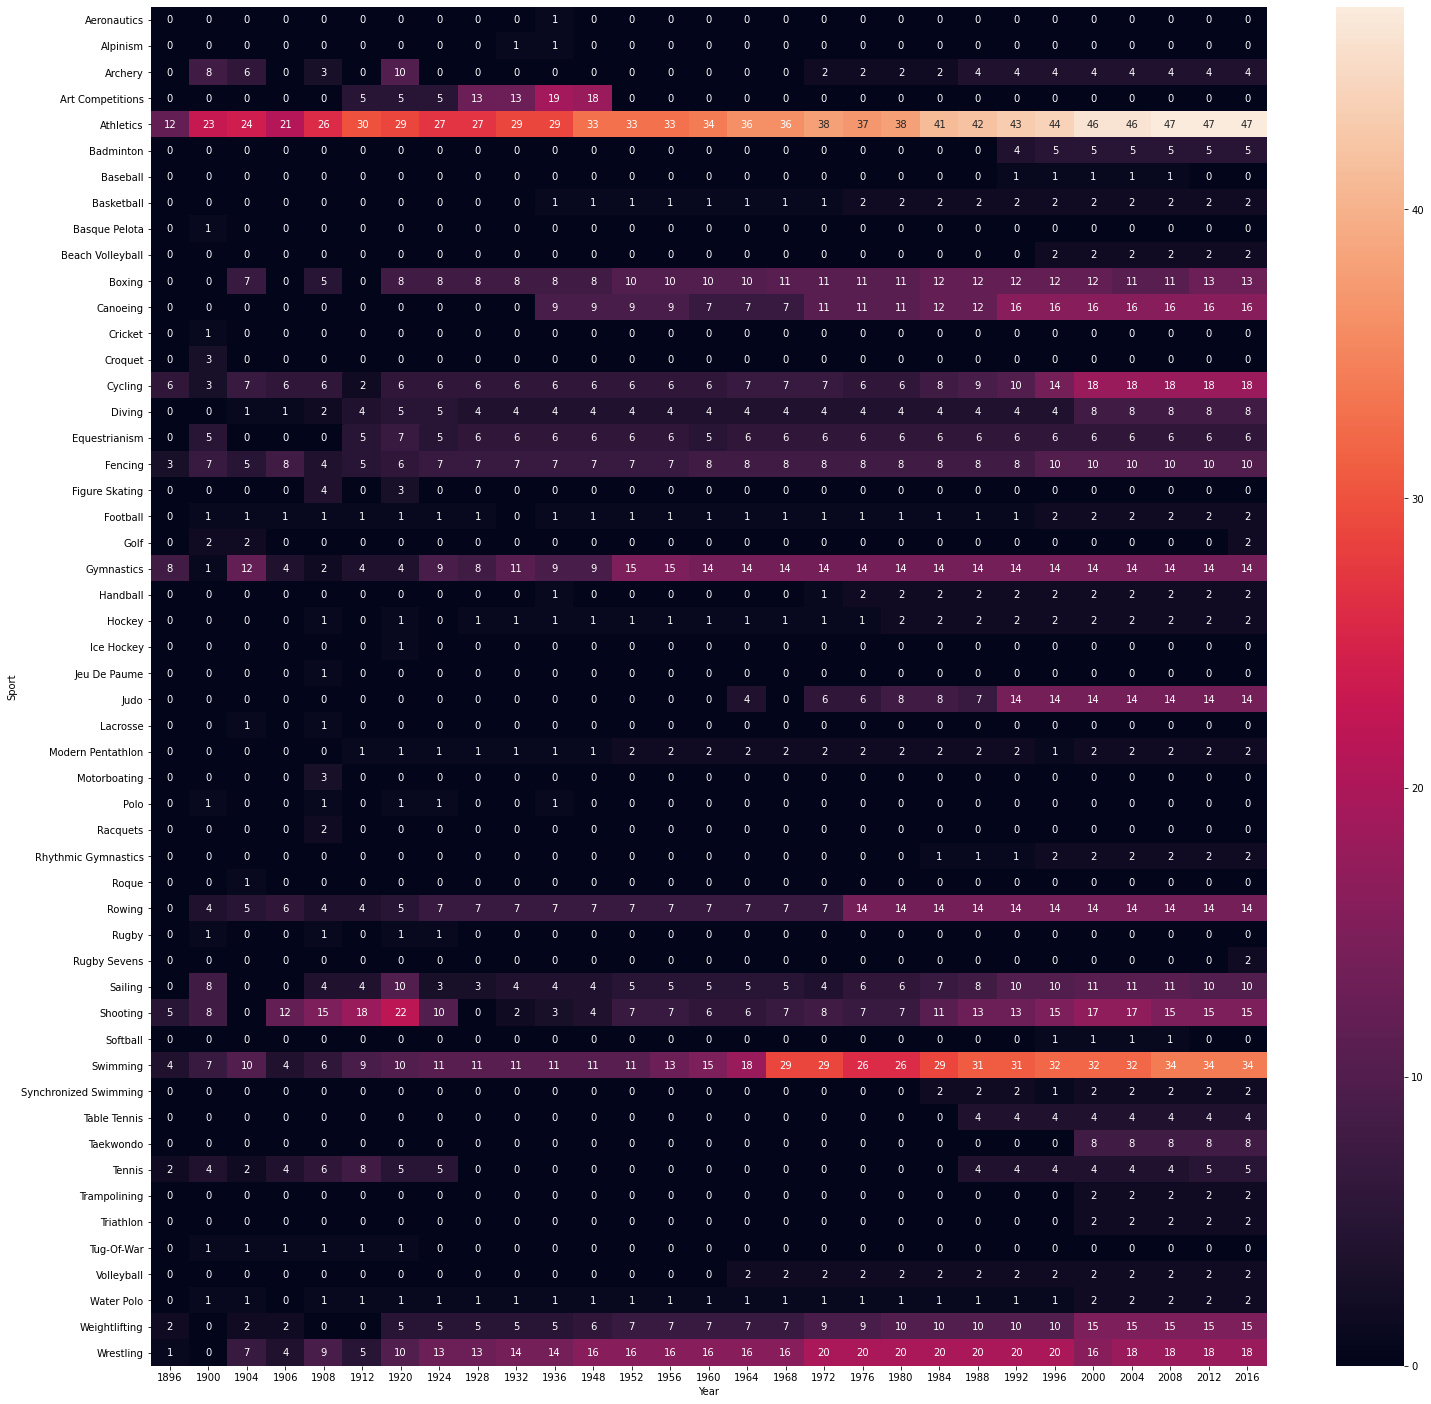

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [89]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
sport_list = df['Sport'].unique().tolist()
sport_list.sort()

In [93]:
sport_list

['Aeronautics',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Modern Pentathlon',
 'Motorboating',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Softball',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling']

In [94]:
temp_df = df.dropna(subset=['Medal'])

In [106]:
def most_successful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]
        
#     temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
#         ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')    
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x','Year', 'Sport', 'region']].drop_duplicates('index')  
    
    x.rename(columns={'index': 'Name', 'Name_x': 'Medals'}, inplace=True)
    return x

In [107]:
most_successful(df,'Archery')

,Name,Medals,Year,Sport,region
0,Gerard Theodor Hubert Van Innis,10,1900,Archery,Belgium
11,Kim Su-Nyeong,6,1988,Archery,South Korea
17,Julien Louis Brul,5,1920,Archery,France
22,Lonce Gaston Quentin,4,1920,Archery,France
26,Ki Bo-Bae,4,2012,Archery,South Korea
30,Park Seong-Hyeon,4,2004,Archery,South Korea
34,Louis Van De Perck,4,1920,Archery,Belgium
38,Eugne Franois Grisot,4,1908,Archery,France
43,Jang Yong-Ho,3,1996,Archery,South Korea
49,Im Dong-Hyeon,3,2004,Archery,South Korea


In [100]:
temp_df['Name'].value_counts().reset_index().head(15).merge(df, left_on='index', right_on='Name', how='left')[
        ['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index')

,index,Name_x,Sport,region
0,"Michael Fred Phelps, II",28,Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
97,Takashi Ono,13,Gymnastics,Japan
130,Edoardo Mangiarotti,13,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",12,Swimming,USA
157,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12,Swimming,USA
195,Birgit Fischer-Schmidt,12,Canoeing,Germany


# Country Wise

In [114]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'],inplace=True)

<ipython-input-114-d79008a884dd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df.drop_duplicates(subset=['Team','NOC','Games','City','Sport','Event','Medal'],inplace=True)


In [116]:
new_df = temp_df[temp_df['region']=='USA']
new_df.groupby('Year').count()['Medal']

Year
1896     19
1900     54
1904    231
1906     23
1908     46
1912     63
1920     95
1924     99
1928     56
1932    110
1936     57
1948     84
1952     76
1956     74
1960     71
1964     90
1968    107
1972     94
1976     94
1984    173
1988     94
1992    108
1996    101
2000     91
2004    101
2008    110
2012    103
2016    121
Name: Medal, dtype: int64

C:\Users\DEVESH TRIPATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


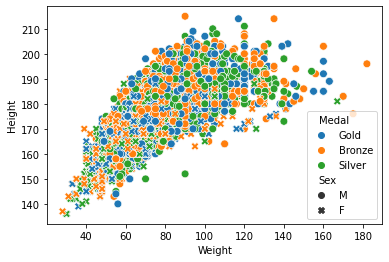

In [117]:
ax = sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=60)

In [118]:
def weight_v_height(df,sport):
    athlete_df = df.drop_duplicates(subset=['Name', 'region'])
    athlete_df['Medal'].fillna('No Medal', inplace=True)
    if sport != 'Overall':
        temp_df = athlete_df[athlete_df['Sport'] == sport]
        return temp_df
    else:
        return athlete_df

In [119]:
temp = weight_v_height(df,'Shooting')

<ipython-input-118-38132346731f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athlete_df['Medal'].fillna('No Medal', inplace=True)


In [120]:
temp

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
62,45,Hakon Aasns,M,41.0,NaN,NaN,Norway,NOR,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",No Medal,Norway,NaN,0,0,0
63,46,Hans Aasns,M,33.0,194.0,93.0,Norway,NOR,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",No Medal,Norway,NaN,0,0,0
123,83,Carlos Arturo Abarza Chavez,M,22.0,NaN,NaN,Chile,CHI,1992 Summer,1992,Summer,Barcelona,Shooting,Shooting Mixed Skeet,No Medal,Chile,NaN,0,0,0
139,94,Ral Abatte,M,38.0,NaN,NaN,Chile,CHI,1984 Summer,1984,Summer,Los Angeles,Shooting,Shooting Mixed Trap,No Medal,Chile,NaN,0,0,0
250,172,Mohamed Abdel Ellah,M,32.0,168.0,68.0,Egypt,EGY,2000 Summer,2000,Summer,Sydney,Shooting,"Shooting Men's Air Rifle, 10 metres",No Medal,Egypt,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222290,135391,Loredana Zugna,F,32.0,170.0,55.0,Italy,ITA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Women's Sporting Pistol, 25 metres",No Medal,Italy,NaN,0,0,0
222311,135405,Fritz Zulauf,M,27.0,NaN,NaN,Switzerland,SUI,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Pistol, Team",Bronze,Switzerland,NaN,1,0,0
222346,135421,Goretti Alejandra Zumaya Flores,F,19.0,165.0,65.0,Mexico,MEX,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,"Shooting Women's Air Rifle, 10 metres",No Medal,Mexico,NaN,0,0,0
222347,135422,"Andreas ""Andi"" Zumbach",M,22.0,173.0,66.0,Switzerland,SUI,1992 Summer,1992,Summer,Barcelona,Shooting,"Shooting Men's Air Rifle, 10 metres",No Medal,Switzerland,NaN,0,0,0


C:\Users\DEVESH TRIPATHI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


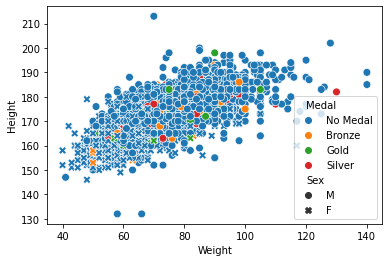

In [121]:
sns.scatterplot(temp['Weight'],temp['Height'],hue=temp['Medal'],style=temp['Sex'],s=60)